In [517]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess

data = preprocess.data

# Moneyball 

"Moneyball" is based on the Oakland Athletics baseball team's 2002 season and Bill James's application of statistics to basball, Sabermetrics.

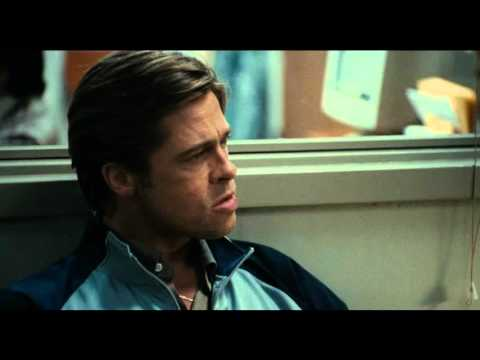

In [519]:
from IPython.display import YouTubeVideo

YouTubeVideo("KWPhV6PUr9o")

Based on the explanation given by the assistant GM Paul DePodesta (a.k.a Peter Brand played by Jonah Hill), the Oakland A's utilized the "Pythagorean Expectation Formula" to predict the number of wins they would need in order to make it to the 2002 playoffs (at least 99 games).

## Pythagorean Expectation Formula

A sports analytics forumla created by Bill James that is designed to estimate the number of wins a baseball team should win based on the number of runs they scored (RS) and allowed (RA).

In [520]:
%%latex
$$Win\,Percentage = \frac{RS^2}{RS^2 + RA^2}$$

<IPython.core.display.Latex object>

### DePodesta's prediction:

To guarantee playoffs, DePodesta predicted that the A's would need at least 99 wins. A team wins if runs scored (RS) is higher than the opposite team. Let's see if DePodesta's prediction is accurate by exploring the relationship between runs scored and wins for playoff teams and non-playoff teams. 

### Moneyball Data Table

In [521]:
mb_data = data[data["Year"] < 2002]

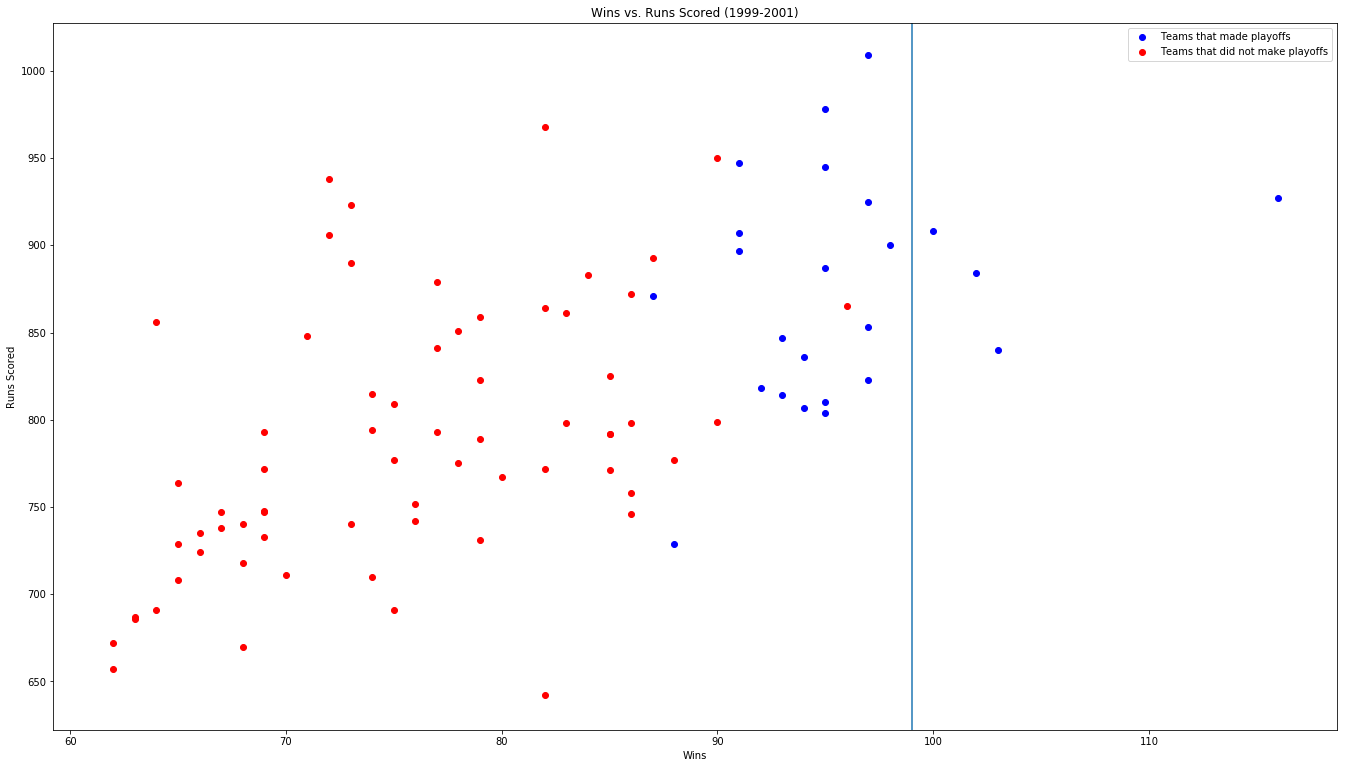

In [522]:
plt.rcParams['figure.figsize'] = (23,13)
mb_made_playoffs = mb_data[mb_data["Playoffs"]==1]
mb_no_playoffs = mb_data[mb_data["Playoffs"]==0]

plt.scatter(mb_made_playoffs["W"],mb_made_playoffs["RS"],color="blue",label="Teams that made playoffs")
plt.scatter(mb_no_playoffs["W"],mb_no_playoffs["RS"],color="red",label="Teams that did not make playoffs")
plt.axvline(x=99)
plt.title("Wins vs. Runs Scored (1999-2001)")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.legend()
plt.show()

In order to replicate DePodesta's insights pre-2002 season and due to missing data from 1965 to 1998, the data was limited between 1999 to 2001. As displayed by the graph, teams that made it to playoffs (1999-2001) had wins in the 90 to 100 region. The graph also shows a few teams that made it between the 90 to 97 win region but did not make it to playoffs. The vertical line represents DePodesta's 99 win prediction and it demonstrates that 99 wins will most likely guarantee a spot in the playoffs.

There are a total of 162 games, not including the postseason, and, therefore, the predicted win percentage for Oakland A's 2002 season would be about:

In [523]:
%%latex
$$ \frac{99\,wins}{162\,games} = 0.61 $$

<IPython.core.display.Latex object>

Then using the pythagorean expectation formula, we can figure out the number of runs scored and runs allowed to make it to the playoffs. To save time, we'll use DePodesta's findings for RS and RA:

In [524]:
%%latex
$$ \frac{(814)^2}{(814)^2+(645)^2} = 0.6143$$

<IPython.core.display.Latex object>

## Learning Outcomes for this Project

The primary goal of this project is to recreate DePodesta's findings using machine learning models. We will attempt to predict the number of wins, runs scored and runs allowed, and compare the outcome with DePodesta's predictions. Then we will compare those predictions with the actual wins, runs scored and runs allowed for the Oakland A's 2002 season.

## Sources

1. https://en.wikipedia.org/wiki/Moneyball_(film)

2. https://en.wikipedia.org/wiki/Paul_DePodesta

3. https://en.wikipedia.org/wiki/Pythagorean_expectation

4. https://en.wikipedia.org/wiki/Major_League_Baseball_schedule

5. https://www.edx.org/course/analytics-edge-mitx-15-071x-3

6. https://en.wikipedia.org/wiki/Run_differential

7. https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/home

8. https://en.wikipedia.org/wiki/On-base_percentage

9. https://en.wikipedia.org/wiki/Slugging_percentage

## Feature Engineering for Models

We are going to create 3 models for the following target features (y-variables):

1. Runs Scored (RS)

2. Runs Allowed (RA)

3. Wins

We are going to use a correlation matrix to find the features most correlated with the target features above. 

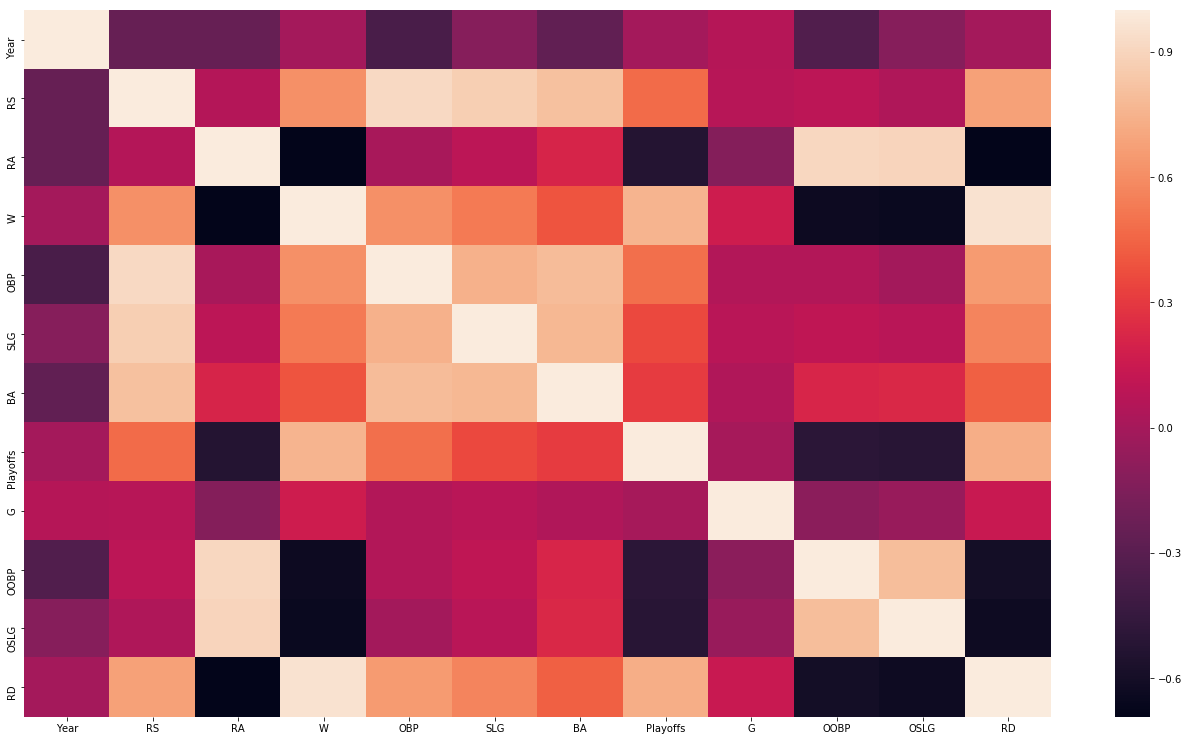

In [525]:
corrmat = mb_data.corr()
sns.heatmap(corrmat)
plt.show()

In [526]:
display(corrmat)

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,-0.249483,-0.244879,0.001162,-0.367716,-0.120332,-0.268421,-1.879061e-17,0.066034,-0.335533,-0.122668,0.000000
RS,-2.494825e-01,1.000000,0.060309,0.614760,0.917409,0.873468,0.814711,4.743457e-01,0.070733,0.091057,0.039787,0.678217
RA,-2.448787e-01,0.060309,1.000000,-0.692420,0.011732,0.089673,0.209079,-5.283824e-01,-0.126306,0.909908,0.895110,-0.692622
W,1.162141e-03,0.614760,-0.692420,1.000000,0.609975,0.528666,0.396178,7.593076e-01,0.166629,-0.633657,-0.646920,0.953997
OBP,-3.677163e-01,0.917409,0.011732,0.609975,1.000000,0.746632,0.794694,4.882261e-01,0.052457,0.052899,-0.008316,0.654298
SLG,-1.203319e-01,0.873468,0.089673,0.528666,0.746632,1.000000,0.771767,3.565079e-01,0.080119,0.101632,0.080376,0.565165
BA,-2.684211e-01,0.814711,0.209079,0.396178,0.794694,0.771767,1.000000,3.091740e-01,0.044219,0.219021,0.231918,0.434799
Playoffs,-1.879061e-17,0.474346,-0.528382,0.759308,0.488226,0.356508,0.309174,1.000000e+00,0.008128,-0.495725,-0.510097,0.731766
G,6.603382e-02,0.070733,-0.126306,0.166629,0.052457,0.080119,0.044219,8.128201e-03,1.000000,-0.100545,-0.045432,0.144100
OOBP,-3.355334e-01,0.091057,0.909908,-0.633657,0.052899,0.101632,0.219021,-4.957250e-01,-0.100545,1.000000,0.796526,-0.604077


We are looking for features that have strong positive correlation with our target variables somewhere between 0.7 to 0.9 (preferably closer to the 0.9 range). 

1. Runs Allowed (RA): Opponent's On-Base Percentage (OOBP), Opponent's Slugging Percentage (OSLG)

2. Runs Scored (RS): On-Base Percentage (OBP), Slugging Percentage (SLG), Batting Average (BA)

3. Wins (W): Run Differential (RD)

It also appears there is some potential multicollinearity in our independent variables. This could be attributed to the method in which some of these features were calculated. May need to address this depending on which supervised learning model we choose to implement.

### Some Key Baseball Terminology

On-Base Percentage (OBP): a statistic that measures how frequently a batter reaches base

Slugging Percentage (SLG): measure of the batting productivity of a hitter

Batting Average (BA): measures the performance of batter

Run Differential (RD): cumulative team statistic that combines offensive and defensive scoring (RS - RA). Can be used to predict the expected win total for a team.

### Baseball Statistic Calculations

In [527]:
%%latex
$$OBP = \frac{Hits(H)+Walks(BB)+HitByPitch(HBP)}{AtBat(AB)+Walks(BB)+HitByPitch(HBP)+SacrificeFly(SF)}$$
$$$$
$$SLG = \frac{Single(1B) + (2*Double(2B)) + (3*Triple(3B)) + (4*HomeRun(HR))}{AtBat(AB)}$$
$$$$
$$BA = \frac{Hits(H)}{AtBat(AB)}$$

<IPython.core.display.Latex object>

As demonstrated by the formulas used above, some of the independent variables for our future models share some common baseball statistics (i.e. AB, H) which could contribute to the multicollinearity seen in the correlation matrix.

## Setting up the models

In [528]:
mb_data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86


### 1. Runs Scored (RS)

In [529]:
X_RS = mb_data[["OBP","SLG","BA"]]
y_RS = mb_data["RS"]

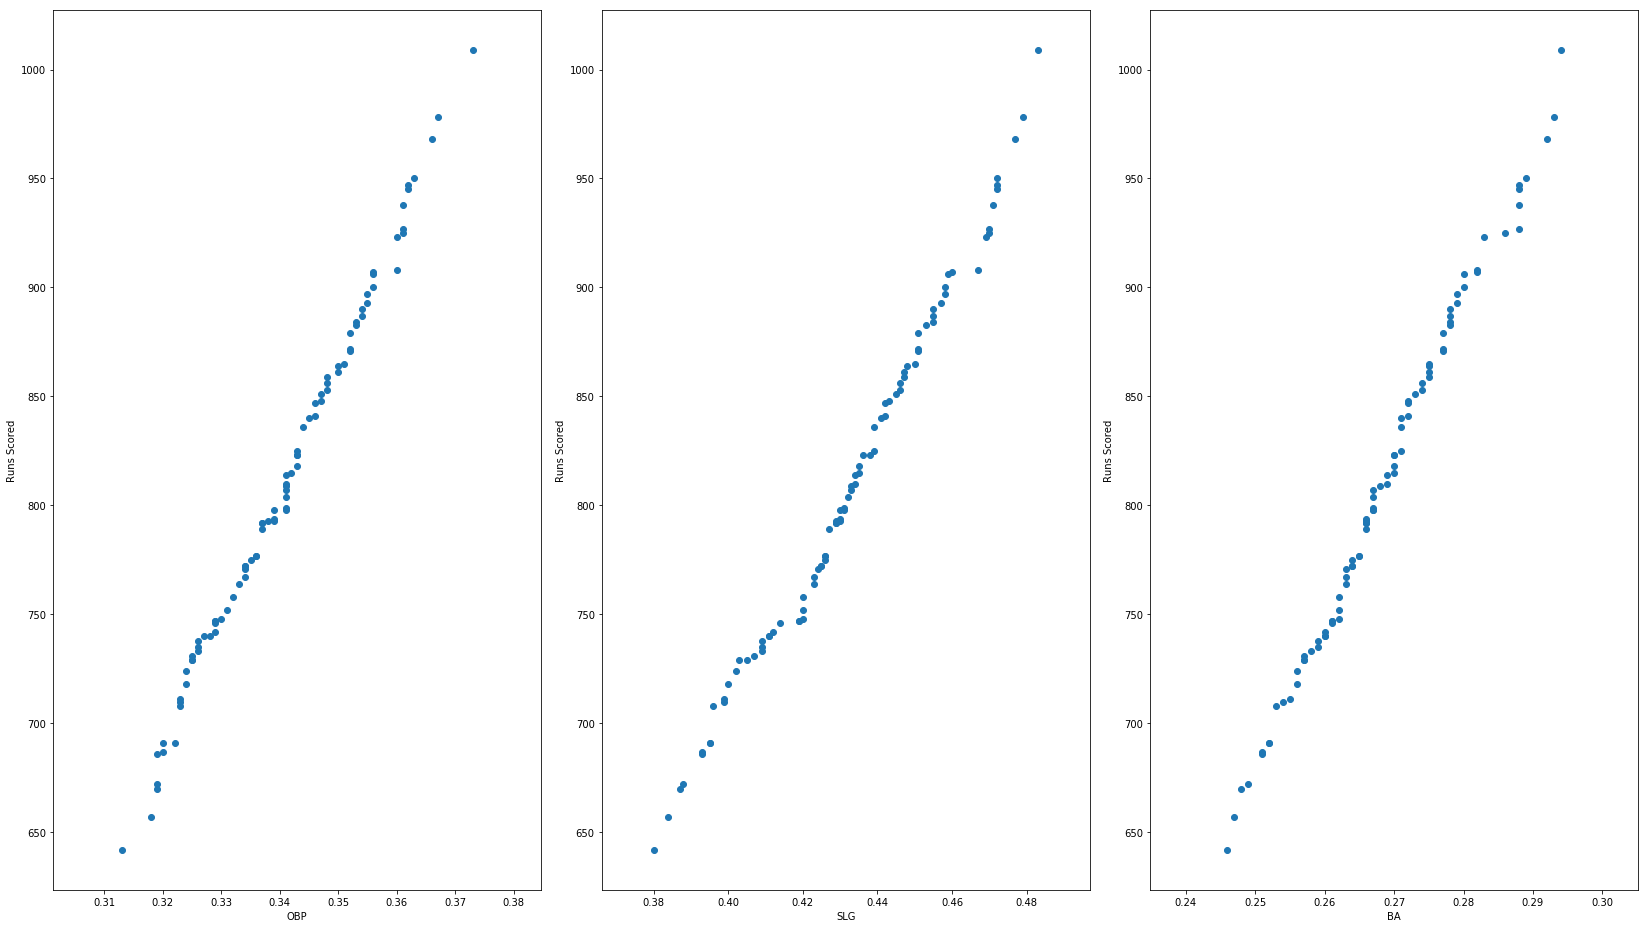

In [530]:
from numpy.polynomial.polynomial import polyfit

fig,ax = plt.subplots(nrows=1,ncols=3)
y_ax = 0
for col in X_RS.columns:
    x_sort = sorted(X_RS[col].values)
    y_sort = sorted(y_RS.values)
    ax[y_ax].scatter(x_sort,y_sort)
    ax[y_ax].set_ylabel("Runs Scored")
    ax[y_ax].set_xlabel("{}".format(col))
    y_ax += 1
    
fig.tight_layout()
plt.show()

Appears that the chosen independent variables (OBP,SLG,BA) have a linear relationship with the dependent variable (RS). 

In [531]:
# create train and test set for RS
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_RS,y_RS,test_size=0.2)

In [532]:
# fit linear regression to RS dataset
from sklearn.linear_model import LinearRegression
regr_RS = LinearRegression()
regr_RS.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

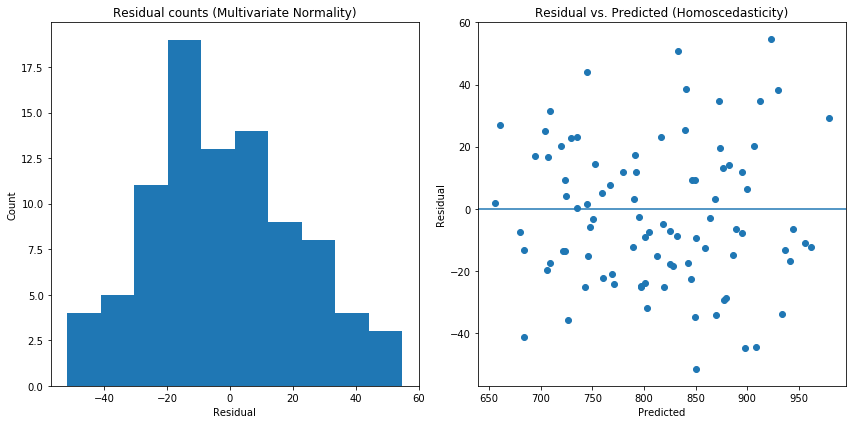

In [533]:
# checking for multivariate normality & homoscedasticity
actual = mb_data["RS"]
predicted = regr_RS.predict(X_RS).ravel()
residual = actual - predicted

plt.rcParams['figure.figsize'] = (12,6)
fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(residual)
ax[0].set_title("Residual counts (Multivariate Normality)")
ax[0].set_xlabel("Residual")
ax[0].set_ylabel("Count")

ax[1].scatter(predicted, residual)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')
ax[1].axhline(y=0)
ax[1].set_title('Residual vs. Predicted (Homoscedasticity)')

fig.tight_layout()
plt.show()

In [534]:
# evaluating model performance (RS)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(X_RS,y_RS))

Coefficients:
 [3435.09667522 1260.49514378  596.41824084]

Intercept:
 -1062.5811147651534

R-squared:
 0.920455760844538


In [535]:
# check for possible overfitting using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print(cvs)

[0.90630406 0.91712937 0.84904831 0.89156304 0.78927319 0.90691309
 0.92118513 0.93347435 0.83899987 0.96981124]


The R-squared is relatively consistent, doesn't appear to be any overfitting.  

In [536]:
# test individual parameters
linear_formula = 'RS ~ OBP + SLG + BA'
lm = sm.ols(formula=linear_formula,data=mb_data).fit()

In [537]:
lm.pvalues

Intercept    2.079257e-27
OBP          3.477936e-18
SLG          2.147342e-12
BA           5.570869e-01
dtype: float64

In [538]:
# seems BA has a p-value > 0.05, try dropping BA and re-testing model performance
X_RS = mb_data[["OBP","SLG"]]
X_train,X_test,y_train,y_test = train_test_split(X_RS,y_RS,test_size=0.2)
regr_RS.fit(X_train,y_train)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(X_RS,y_RS))
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print("\nCross Valuation Scores:\n",cvs)

Coefficients:
 [3333.95690619 1499.41750871]

Intercept:
 -973.1402915621184

R-squared:
 0.9212065071544965

Cross Valuation Scores:
 [0.90605552 0.91645763 0.84810155 0.89336291 0.82663102 0.9242212
 0.92233504 0.93491226 0.84191608 0.97502401]


After removing Batting Average, the model appears to perform better. The R-squared value changed slightly, but not enough to be of concern. On the other hand, the cross validation scores improved significantly with more consistency between folds. This would suggest that including BA was causing slight overfitting for the model. 

For the Runs Scored model, we have concluded that the independent variables have a linear relationship with the dependent variable. Therefore, we decided to try a multivariate linear regression model, due to multiple independent variables, to generate the predictions for the analysis. However, we needed to be certain that the data fit the assumptions of linear regression models before evaluating the model. We established that the model does conform to the assumptions of linear regression models through our visuals pertaining to multivariate normality, homscedasticity and linear relationship. 

### 2. Runs Allowed (RA)

In [539]:
X_RA = mb_data[["OOBP","OSLG"]]
y_RA = mb_data["RA"]

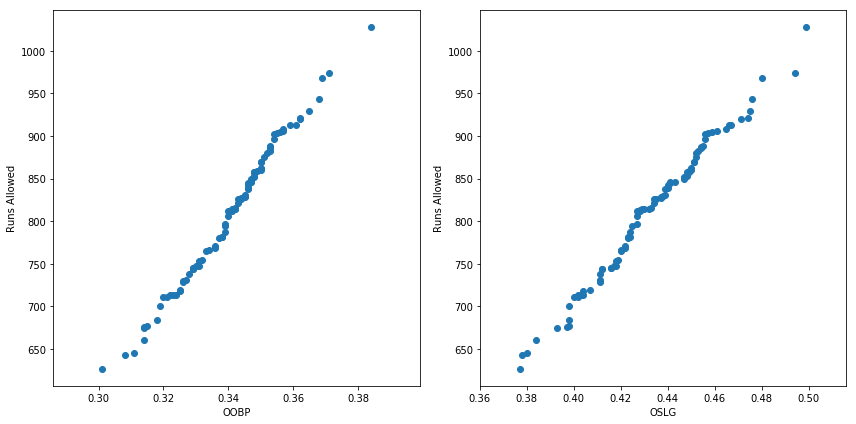

In [540]:
fig,ax = plt.subplots(nrows=1,ncols=2)
y_ax = 0
for col in X_RA.columns:
    x_sort = sorted(X_RA[col].values)
    y_sort = sorted(y_RA.values)
    ax[y_ax].scatter(x_sort,y_sort)
    ax[y_ax].set_ylabel("Runs Allowed")
    ax[y_ax].set_xlabel("{}".format(col))
    y_ax += 1
    
fig.tight_layout()
plt.show()

In [541]:
# create train and test set for RA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_RA,y_RA,test_size=0.2)

In [542]:
# fit linear regression to RA dataset
from sklearn.linear_model import LinearRegression
regr_RA = LinearRegression()
regr_RA.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

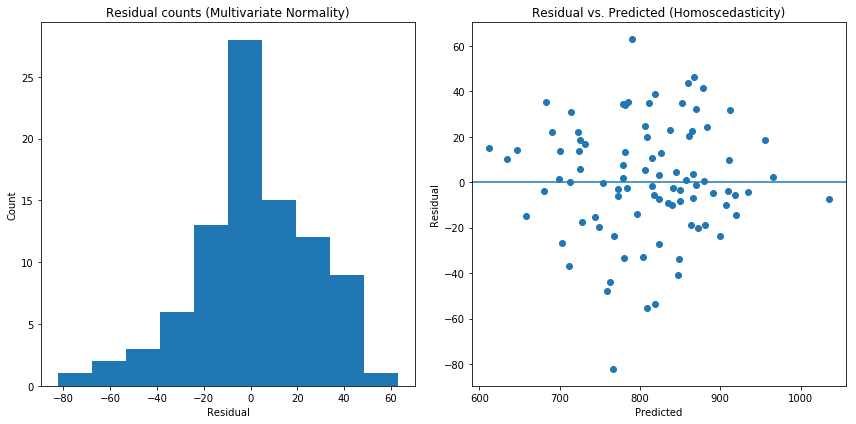

In [543]:
# checking for multivariate normality & homoscedasticity
actual = mb_data["RA"]
predicted = regr_RA.predict(X_RA).ravel()
residual = actual - predicted

fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(residual)
ax[0].set_title("Residual counts (Multivariate Normality)")
ax[0].set_xlabel("Residual")
ax[0].set_ylabel("Count")

ax[1].scatter(predicted, residual)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')
ax[1].axhline(y=0)
ax[1].set_title('Residual vs. Predicted (Homoscedasticity)')

fig.tight_layout()
plt.show()

In [544]:
# evaluating model performance (RA)
print("Coefficients:\n",regr_RA.coef_)
print("\nIntercept:\n",regr_RA.intercept_)
print("\nR-squared:\n",regr_RA.score(X_RA,y_RA))

Coefficients:
 [2806.41826443 1576.32268892]

Intercept:
 -828.822581313789

R-squared:
 0.9069805677089585


In [545]:
# check for possible overfitting using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print(cvs)

[0.90605552 0.91645763 0.84810155 0.89336291 0.82663102 0.9242212
 0.92233504 0.93491226 0.84191608 0.97502401]


In [546]:
# test individual parameters
linear_formula = 'RA ~ OOBP + OSLG'
lm = sm.ols(formula=linear_formula,data=mb_data).fit()

In [547]:
lm.pvalues

Intercept    8.287275e-24
OOBP         4.460430e-16
OSLG         2.545357e-13
dtype: float64

### 3. Wins (W)

In [548]:
X_W = mb_data[["RD"]]
y_W = mb_data["W"]

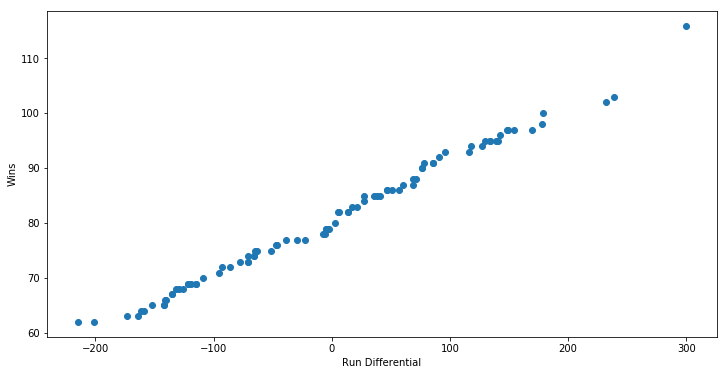

In [549]:
x_sort = sorted(X_W.values)
y_sort = sorted(y_W.values)
plt.scatter(x_sort,y_sort)
plt.ylabel("Wins")
plt.xlabel("Run Differential")
plt.show()

In [550]:
# create train and test set for W
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_W,y_W,test_size=0.2)

In [551]:
# fit linear regression to W dataset
from sklearn.linear_model import LinearRegression
regr_W = LinearRegression()
regr_W.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

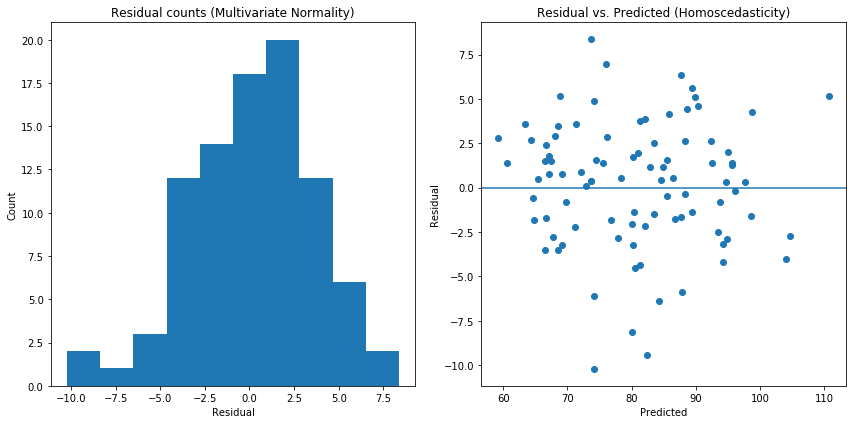

In [552]:
# checking for multivariate normality & homoscedasticity
actual = mb_data["W"]
predicted = regr_W.predict(X_W).ravel()
residual = actual - predicted

fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(residual)
ax[0].set_title("Residual counts (Multivariate Normality)")
ax[0].set_xlabel("Residual")
ax[0].set_ylabel("Count")

ax[1].scatter(predicted, residual)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')
ax[1].axhline(y=0)
ax[1].set_title('Residual vs. Predicted (Homoscedasticity)')

fig.tight_layout()
plt.show()

In [553]:
# evaluating model performance (W)
print("Coefficients:\n",regr_W.coef_)
print("\nIntercept:\n",regr_W.intercept_)
print("\nR-squared:\n",regr_W.score(X_W,y_W))

Coefficients:
 [0.10033168]

Intercept:
 80.74724749859321

R-squared:
 0.909765886556167


In [554]:
# check for possible overfitting using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print(cvs)

[0.90605552 0.91645763 0.84810155 0.89336291 0.82663102 0.9242212
 0.92233504 0.93491226 0.84191608 0.97502401]


In [555]:
# test individual parameters
linear_formula = 'W ~ RD'
lm = sm.ols(formula=linear_formula,data=mb_data).fit()

In [556]:
lm.pvalues

Intercept    9.510768e-122
RD            8.161906e-48
dtype: float64

## Making Predictions

Now that we have tested our individual models' performance, it's time to see if the models can make accurate predictions for the Oakland A's 2002 season. 

According to the film adaptation, DePodesta predicted the following:

RS: 814

RA: 645

W: 99 

The Oakland A's actual season outcomes are as follows:

RS: 800

RA: 654

W: 103

Source: https://www.baseball-reference.com/teams/OAK/2002-schedule-scores.shtml

Oakland A's stats in 2001:

In [557]:
display(mb_data[(mb_data["Year"] == 2001) & (mb_data["Team"] == "OAK")])

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
350,OAK,AL,2001,884,645,102,0.345,0.439,0.264,1,162,0.308,0.38,239


### 1. Runs Scored (RS)

In [558]:
RS_pred = regr_RS.predict([[0.345,0.439]])
print("RS (prediction): ",RS_pred)

RS (prediction):  [835.3191274]


### 2. Runs Allowed (RA)

In [559]:
RA_pred = regr_RA.predict([[0.308,0.38]])
print("RA (prediction): ",RA_pred)

RA (prediction):  [634.55686592]


### 3. Wins (W)
Need to find the actual Run Differential for 2001 season to make a prediction for the amount of wins in 2002 season

In [560]:
# finding RD for 2001 season
RD_2001 = RS_pred - RA_pred
print(RD_2001)

[200.76226148]


In [561]:
W_pred = regr_W.predict([RD_2001])
print("W (prediction): ",W_pred)

W (prediction):  [100.89006242]


### Comparing Results

In [562]:
comp_df = pd.DataFrame(index=["RS","RA","W"])
comp_df["DePodesta"] = [814,645,99]
comp_df["Regression Model"] = [round(*RS_pred),round(*RA_pred),round(*W_pred)]
comp_df["Actual"] = [800,654,100]
display(comp_df)

,DePodesta,Regression Model,Actual
RS,814,835.0,800
RA,645,635.0,654
W,99,101.0,100


The outcome of our multivariate linear regression model appears to be underperforming compared to DePodesta's estimates in terms of RS and RA, but it outperforms DePodesta in predicting the number of wins for the 2002 season.

## Improving accuracy with other regression models

Lets try and get closer to the actual values for the Oakland A's 2002 season by using three other regression models:

1. Support Vector Regression (SVR)

2. Random Forest Regression 

3. Boosting Model (XGBoost)

### Support Vector Regression (SVR)

In [563]:
from sklearn.preprocessing import StandardScaler
# RS
sc_rsx = StandardScaler()
rsx_scale = sc_rsx.fit_transform(X_RS)
sc_rsy = StandardScaler()
rsy_scale = sc_rsy.fit_transform(y_RS.values.reshape(-1,1))

# RA
sc_rax = StandardScaler()
rax_scale = sc_rax.fit_transform(X_RA)
sc_ray = StandardScaler()
ray_scale = sc_ray.fit_transform(y_RA.values.reshape(-1,1))

# W
sc_rwx = StandardScaler()
rwx_scale = sc_rwx.fit_transform(X_W)
sc_rwy = StandardScaler()
rwy_scale = sc_rwy.fit_transform(y_W.values.reshape(-1,1))

/home/glenn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [564]:
from sklearn.svm import SVR
# RS
svr_RS = SVR(kernel="linear")
svr_RS.fit(rsx_scale,rsy_scale.ravel())

# RA
svr_RA = SVR(kernel="linear")
svr_RA.fit(rax_scale,ray_scale.ravel())

# W
svr_W = SVR(kernel="linear")
svr_W.fit(rwx_scale,rwy_scale.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [565]:
print("RS Cross Validation Score:\n",cross_val_score(svr_RS,rsx_scale,rsy_scale.ravel(),cv=10))
print("\nRA Cross Validation Score:\n",cross_val_score(svr_RA,rax_scale,ray_scale.ravel(),cv=10))
print("\nW Cross Validation Score:\n",cross_val_score(svr_W,rwx_scale,rwy_scale.ravel(),cv=10))

RS Cross Validation Score:
 [0.89592561 0.9268608  0.8295721  0.90119521 0.80269727 0.91499192
 0.92141968 0.92166835 0.9031421  0.97588132]

RA Cross Validation Score:
 [0.92306162 0.85832537 0.73783926 0.86917098 0.85830405 0.80204829
 0.94002942 0.9221039  0.82802549 0.88861144]

W Cross Validation Score:
 [0.9230801  0.73800181 0.91212168 0.92777575 0.58660053 0.91918856
 0.93225033 0.94244484 0.90200845 0.84889545]


In [566]:
print("RS (R^2): ",svr_RS.score(rsx_scale,rsy_scale.ravel()))
print("\nRA (R^2): ",svr_RA.score(rax_scale,ray_scale.ravel()))
print("\nW (R^2): ",svr_W.score(rwx_scale,rwy_scale.ravel()))

RS (R^2):  0.918258760176958

RA (R^2):  0.9062959135785114

W (R^2):  0.9096408449040381


In [567]:
svr_RS_pred = sc_rsy.inverse_transform(svr_RS.predict(sc_rsx.transform(np.array([[0.345,0.439]]))))
svr_RA_pred = sc_ray.inverse_transform(svr_RA.predict(sc_rax.transform(np.array([[0.308,0.38]]))))
svr_RD = svr_RS_pred - svr_RA_pred
svr_W_pred = sc_rwy.inverse_transform(svr_W.predict(sc_rwx.transform(np.array([svr_RD]))))

In [568]:
comp_df2 = pd.DataFrame(index=["RS","RA","W"])
comp_df2["DePodesta"] = [814,645,99]
comp_df2["SVR Model"] = [round(*svr_RS_pred),round(*svr_RA_pred),round(*svr_W_pred)]
comp_df2["Actual"] = [800,654,100]
display(comp_df2)

,DePodesta,SVR Model,Actual
RS,814,832.0,800
RA,645,641.0,654
W,99,99.0,100


### Random Forest

In [569]:
# 100 tree forest
from sklearn.ensemble import RandomForestRegressor
# RS
rf_regr_RS = RandomForestRegressor(n_estimators=100)
rf_regr_RS.fit(X_RS,y_RS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [570]:
# RA
rf_regr_RA = RandomForestRegressor(n_estimators=100)
rf_regr_RA.fit(X_RA,y_RA)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [571]:
# W
rf_regr_W = RandomForestRegressor(n_estimators=100)
rf_regr_W.fit(X_W,y_W)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [572]:
print("RS Cross Validation Score:\n",cross_val_score(rf_regr_RS,X_RS,y_RS,cv=10))
print("\nRA Cross Validation Score:\n",cross_val_score(rf_regr_RA,X_RA,y_RA,cv=10))
print("\nW Cross Validation Score:\n",cross_val_score(rf_regr_W,X_W,y_W,cv=10))

RS Cross Validation Score:
 [0.86132589 0.91482616 0.79291787 0.81297587 0.76976612 0.93167666
 0.82627013 0.90763845 0.73405955 0.93242648]

RA Cross Validation Score:
 [0.80999202 0.70136667 0.74521779 0.88783007 0.82857367 0.8428196
 0.85612035 0.88276746 0.82394576 0.56682604]

W Cross Validation Score:
 [0.8401343  0.72624782 0.78553803 0.86802109 0.17532273 0.77502895
 0.94003114 0.92994371 0.89668849 0.71013891]


In [573]:
print("RS (R^2): ",rf_regr_RS.score(X_RS,y_RS))
print("\nRA (R^2): ",rf_regr_RA.score(X_RA,y_RA))
print("\nW (R^2): ",rf_regr_W.score(X_W,y_W))

RS (R^2):  0.9824540300740452

RA (R^2):  0.9823262050054946

W (R^2):  0.9657239852013939


In [574]:
rf_RS_pred = rf_regr_RS.predict([[0.345,0.439]])
rf_RA_pred = rf_regr_RA.predict([[0.308,0.38]])
rf_RD = rf_RS_pred - rf_RA_pred
rf_W_pred = rf_regr_W.predict([rf_RD])

In [575]:
comp_df3 = pd.DataFrame(index=["RS","RA","W"])
comp_df3["DePodesta"] = [814,645,99]
comp_df3["Random Forest Model"] = [round(*rf_RS_pred),round(*rf_RA_pred),round(*rf_W_pred)]
comp_df3["Actual"] = [800,654,100]
display(comp_df3)

,DePodesta,Random Forest Model,Actual
RS,814,861.0,800
RA,645,646.0,654
W,99,101.0,100


### Boosting Model (XGboost)

In [576]:
from xgboost import XGBRegressor as xgbr
df1 = mb_data[["OBP","SLG","RS"]]
df1 = df1.rename(columns={"OBP":"f0","SLG":"f1"})
X1_RS = df1[["f0","f1"]]
xg_RS = xgbr()
xg_RS.fit(X1_RS,y_RS)

df2 = mb_data[["OOBP","OSLG","RA"]]
df2 = df2.rename(columns={"OOBP":"f0","OSLG":"f1"})
X1_RA = df2[["f0","f1"]]
xg_RA = xgbr()
xg_RA.fit(X1_RA,y_RA)

df3 = mb_data[["RD"]]
df3 = df3.rename(columns={"RD":"f0"})
X1_W = df3[["f0"]]
xg_W = xgbr()
xg_W.fit(X1_W,y_W)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [580]:
print("RS Cross Validation Score:\n",cross_val_score(xg_RS,X1_RS,y_RS,cv=10))
print("\nRA Cross Validation Score:\n",cross_val_score(xg_RA,X1_RA,y_RA,cv=10))
print("\nW Cross Validation Score:\n",cross_val_score(xg_W,X1_W,y_W,cv=10))

RS Cross Validation Score:
 [0.88455953 0.89713933 0.79691825 0.81913717 0.80486578 0.93968625
 0.75891527 0.89578927 0.76176786 0.91975094]

RA Cross Validation Score:
 [0.80413269 0.69312144 0.78285023 0.89002428 0.84385061 0.81750829
 0.86793079 0.87564756 0.80846323 0.80965603]

W Cross Validation Score:
 [0.84221491 0.70151752 0.78828799 0.89665315 0.24875724 0.78823169
 0.93988496 0.92360161 0.8892294  0.83363861]


In [579]:
print("RS (R^2): ",xg_RS.score(X1_RS,y_RS))
print("\nRA (R^2): ",xg_RA.score(X1_RA,y_RA))
print("\nW (R^2): ",xg_W.score(X1_W,y_W))

RS (R^2):  0.9783815427326371

RA (R^2):  0.9717393272736071

W (R^2):  0.9587717518540445


In [581]:
xg_RS_pred = xg_RS.predict([[0.345,0.439]])
xg_RA_pred = xg_RA.predict([[0.308,0.38]])
xg_RD = xg_RS_pred - xg_RA_pred
xg_W_pred = xg_W.predict([xg_RD])

In [582]:
comp_df4 = pd.DataFrame(index=["RS","RA","W"])
comp_df4["DePodesta"] = [814,645,99]
comp_df4["XGBoost Model"] = [round(*xg_RS_pred),round(*xg_RA_pred),round(*xg_W_pred)]
comp_df4["Actual"] = [800,654,100]
display(comp_df4)

,DePodesta,XGBoost Model,Actual
RS,814,852.0,800
RA,645,644.0,654
W,99,101.0,100


In [ ]:
# make a table comparing the different models' accuracy 